In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import torch
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import torch_geometric.transforms as T
from torch_geometric.datasets import IMDB
import matplotlib.pyplot as plt

## IMDB

In [2]:
dataset = IMDB(root='./imdb_data')
data = dataset[0]
movie = data['movie'].x.tolist()
df = pd.DataFrame(movie)
df['class'] = data['movie'].y.tolist()

In [3]:
def get_selected_features(X):
    col_sum = X.sum(axis=0)
    sorted_colsum = sorted(col_sum, reverse=True)
    colsum_df = pd.DataFrame(col_sum)
    
    sorted_colsum = sorted(col_sum, reverse=True)[:10]
    index_list = list(np.ravel(colsum_df[colsum_df[0].isin(sorted_colsum)].index))
    
    imp_feat = X[index_list]
    #imp_feat = imp_feat.drop(imp_feat[imp_feat.sum(axis=1) == 0.0].index)

    return imp_feat

Feature selection from Bag-of-Words features of Movie node

In [4]:
# Feature selection for Movie class 0
class0 = df[df['class'] == 0].drop(['class'], axis=1)
X = class0
imp_feat0 = get_selected_features(class0)
imp_feat0.head()

,87,102,747,1015,1023,1381,1812,1928,2095,2746
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Feature selection for Movie class 1
class1 = df[df['class'] == 1].drop(['class'], axis=1)
X = class1
imp_feat1 = get_selected_features(class1)
imp_feat1.head()

,1023,1111,1381,1624,1654,1866,1900,2393,2439,2774
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Feature selection for Movie class 2
class2 = df[df['class'] == 2].drop(['class'], axis=1)
X = class2
imp_feat2 = get_selected_features(class2)
imp_feat2.head()

,747,1023,1381,1624,1654,1900,1914,1928,2393,2774
21,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
42,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Features of each class of Movie node sampled using Diffusion Models

In [7]:
class_path = '../../../../../../graph generator/diffusion models/sampled_features_diffusion/dependence/DiTabDDPM/imdb/frequency/'

In [8]:
sampled0  = pd.DataFrame(torch.load(class_path + 'movie0_10feat.pt').cpu().numpy())
sampled0.head()

,0,1,2,3,4,5,6,7,8,9
0,5,0,0,0,0,0,2,0,2,0
1,3,4,0,5,0,3,3,0,0,0
2,1,1,4,5,2,5,0,1,0,0
3,0,0,0,5,2,5,0,5,1,0
4,0,0,0,0,4,5,2,0,3,0


In [9]:
sampled1  = pd.DataFrame(torch.load(class_path + 'movie1_10feat.pt').cpu().numpy())
sampled1.head()

,0,1,2,3,4,5,6,7,8,9
0,0,0,1,0,0,5,3,0,0,5
1,1,4,5,0,4,0,1,0,3,0
2,0,0,5,0,2,5,4,0,4,1
3,0,0,0,5,3,3,2,0,2,0
4,0,0,1,4,3,0,0,0,5,4


In [10]:
sampled2  = pd.DataFrame(torch.load(class_path + 'movie2_10feat.pt').cpu().numpy())
sampled2.head()

,0,1,2,3,4,5,6,7,8,9
0,0,4,0,0,4,3,0,0,4,0
1,4,0,3,0,4,5,5,0,1,5
2,1,0,2,3,0,1,3,3,0,4
3,0,5,1,4,3,0,3,1,5,0
4,0,1,5,4,4,0,2,0,0,1


In [11]:
def cosine_sim(original,sampled):
    return cosine_similarity(original, sampled)

### Pairwise cosine similarity of all features for real and synthetic distributions

Movie class 0

In [12]:
real_class0= np.array(imp_feat0)
cosine_sim(real_class0,sampled0)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.25724788, 0.41380294, ..., 0.        , 0.        ,
        0.55391171],
       [0.24618298, 0.25724788, 0.33104236, ..., 0.40824829, 0.        ,
        0.30772873],
       [0.        , 0.        , 0.46816459, ..., 0.57735027, 0.        ,
        0.43519414]])

<AxesSubplot:>

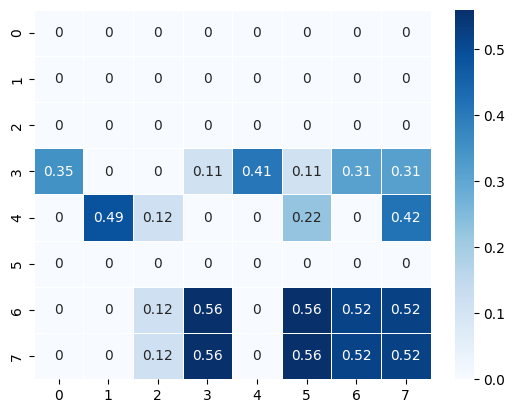

In [13]:
sns.heatmap(cosine_sim(real_class0[:8],sampled0[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)

In [14]:
avg_cossim_class0 = np.mean(cosine_sim(real_class0,sampled0))
avg_cossim_class0

0.08285184028927109

Movie class 1

In [15]:
real_class1= np.array(imp_feat1)
cosine_sim(real_class1,sampled1)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.12909944, 0.60633906, 0.53605627, ..., 0.12909944, 0.29488391,
        0.        ],
       [0.        , 0.48507125, 0.        , ..., 0.51639778, 0.29488391,
        0.51847585],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

<AxesSubplot:>

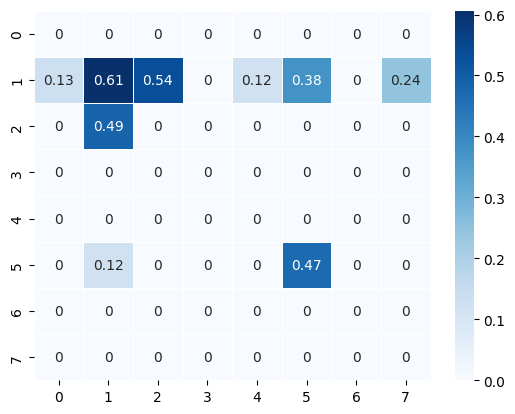

In [16]:
sns.heatmap(cosine_sim(real_class1[:8],sampled1[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)

In [17]:
avg_cossim_class1 = np.mean(cosine_sim(real_class1,sampled1))
avg_cossim_class1

0.1014651981026796

Movie class 2

In [18]:
real_class2= np.array(imp_feat2)
cosine_sim(real_class2,sampled2)

array([[0.        , 0.        , 0.42857143, ..., 0.        , 0.        ,
        0.23866719],
       [0.        , 0.52297636, 0.60609153, ..., 0.35634832, 0.        ,
        0.50628956],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

<AxesSubplot:>

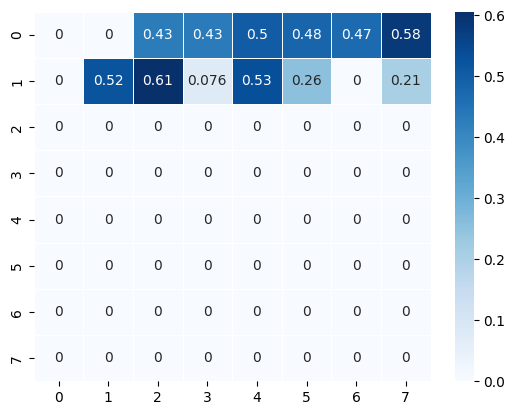

In [19]:
sns.heatmap(cosine_sim(real_class2[:8],sampled2[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)

In [20]:
avg_cossim_class2 = np.mean(cosine_sim(real_class2,sampled2))
avg_cossim_class2

0.08218454471051093

In [21]:
(avg_cossim_class0 + avg_cossim_class1 +avg_cossim_class2)/3

0.08883386103415387